In [2]:
import cv2
import re
import os
import csv
import pytesseract
from pytesseract import Output
from PIL import Image
import time

In [31]:
# model = ori, fast, best
model = "fast"
os.environ['TESSDATA_PREFIX'] = f"C:\\Program Files\\Tesseract-OCR\\tessdata_{model}"    
oem_mode  = 1

custom_config = r'--oem {} --psm 3'.format(oem_mode)

In [32]:
image  = Image.open("C:\\Users\\M-S-I\\Documents\\IBDA Semester 8\\Skripsi\\Machine Learning\\augmented_image\\brightness_change_3.jpg")
print(pytesseract.image_to_string(image, config=custom_config))

BAB 4: HASIL & PEMBAHASAN

A. Implementasi
Dalam melakukan proyek ini, peneliti menggunakan Streamlit yang berbasis
website yang dijabarkan dibawah ini:
1. Web
a. Servis OCR
Berikut adalah tampilan awal ketika ingin menemukan pilihan OCR
pada menu utama halaman website. Dapat dilihat pada bagian Main Menu
pada halaman yang berisikan fitur OCR, Translasi, OCR-Translasi, dan
Admin. Pada tampilan ini user dapat memilih model OCR yaitu Keras-OCR
dan Tesseract. Cara pengerjaan pada halaman utama ini adalah aplikasi
akan menerima file yang diunggah oleh user. Selanjutnya, file akan diubah
ke dalam format PNG. Gambar akan dimasukkan ke dalam model OCR yang
telah dipilih oleh user. Hasil dari model tersebut dipresentasikan dalam
bentuk PDF dan dapat diunduh.




### Get Predictions for WER & CER ###

In [43]:
def get_text_from_filename(filename):
    # Split the filename by the underscore and take the first part
    text_part = filename.split('_')[0]
    return text_part

def predicted_func():
    # Assign directories
    image_directory = (
        "C:\\Users\\M-S-I\\Documents\\IBDA Semester 8\\OCR image\\Synthetic_Data\\synthetic_data"
    )

    # Create a CSV file for writing predictions
    with open(f"tesseract_{model}_{oem_mode}_predictions.csv", "w", newline="", encoding="utf-8") as csvfile:
        csv_writer = csv.writer(csvfile)

        # Open the label file and read actual values into an array
        actual_ar = []

        # Populate actual_ar with text from image filenames
        for filename in os.listdir(image_directory):
            if filename.endswith(".jpg"):
                text_part = get_text_from_filename(filename)
                actual_ar.append(text_part)

        # Write header to the CSV file
        csv_writer.writerow(["Filename", "Actual", "Prediction"])

        # Iterate over files in the directory and actual values simultaneously
        for filename, actual_value in zip(os.listdir(image_directory), actual_ar):
            if filename.endswith(".jpg"):
                # Get prediction
                image = Image.open(os.path.join(image_directory, filename))
                predictions = pytesseract.image_to_string(image, config=custom_config)
                try:
                    # Write filename, actual value, and prediction to CSV
                    csv_writer.writerow([filename, actual_value, predictions.replace("\n", "")])
                except IndexError:
                    csv_writer.writerow(
                        [filename, actual_value, ""]
                    )  # Empty string if no prediction

# Call the function to write predictions to CSV
predicted_func()

### Get WER & CER ###

In [3]:
import pandas as pd
from jiwer import wer, cer

csv_files = [
    "tesseract_results_10000_image\\tesseract_ori_0_predictions.csv",
    "tesseract_results_10000_image\\tesseract_ori_1_predictions.csv",
    "tesseract_results_10000_image\\tesseract_ori_2_predictions.csv",
    "tesseract_results_10000_image\\tesseract_fast_1_predictions.csv",
    "tesseract_results_10000_image\\tesseract_best_1_predictions.csv",
]

def calculate_error_rates(csv_file):
    # Read the CSV file
    df = pd.read_csv(csv_file)

    # Extract actual and prediction columns
    actual_texts = df['Actual'].tolist()
    actual_texts = [str(item) for item in actual_texts]
    predicted_texts = df['Prediction'].tolist()
    predicted_texts = [str(item) for item in predicted_texts]

    # Calculate Word Error Rate (WER)
    word_error_rate = wer(actual_texts, predicted_texts)

    # Calculate Character Error Rate (CER)
    character_error_rate = cer(actual_texts, predicted_texts)

    return word_error_rate, character_error_rate

results = {}

for csv_file in csv_files:
    # Calculate and print WER and CER
    wer_, cer_ = calculate_error_rates(csv_file)
    csv_string = f'{csv_file.replace("_predictions.csv", "").replace("tesseract_results_10000_image", "")}'
    results[csv_string] = {"WER": wer_*100, "CER": cer_*100}

In [4]:
for i in results:
    print(f"{i}\nWER: {results[i]['WER']:.2f}%\nCER: {results[i]['CER']:.2f}%\n")

\tesseract_ori_0
WER: 60.20%
CER: 22.34%

\tesseract_ori_1
WER: 17.81%
CER: 11.24%

\tesseract_ori_2
WER: 17.93%
CER: 11.26%

\tesseract_fast_1
WER: 18.04%
CER: 11.28%

\tesseract_best_1
WER: 17.64%
CER: 11.23%



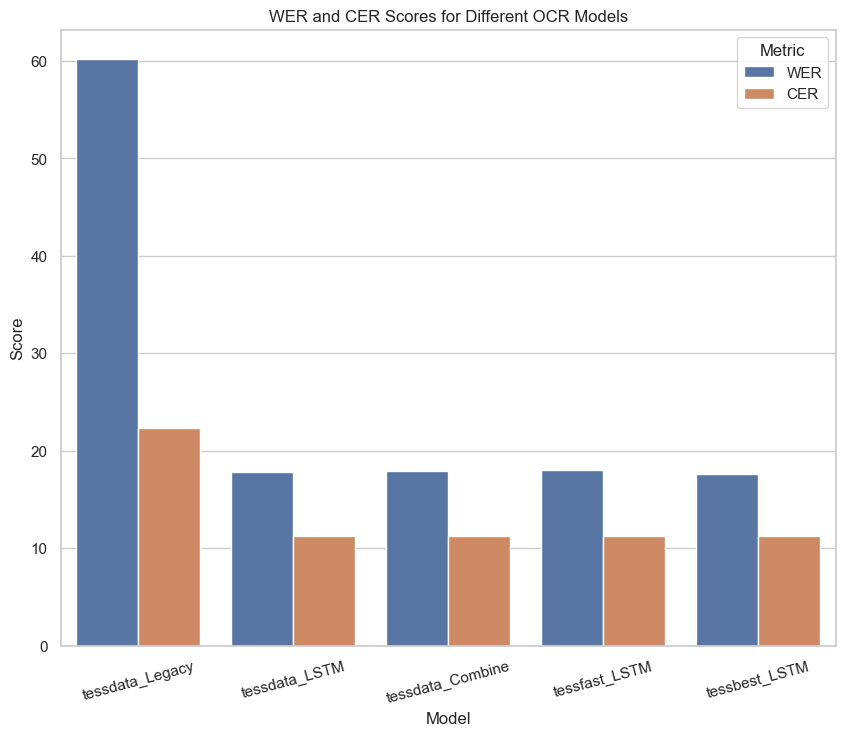

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame
df_metrics = pd.DataFrame(results).T.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')

# Rename columns
df_metrics.columns = ['Model', 'Metric', 'Score']

# Set the plot style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Model', y='Score', hue='Metric', data=df_metrics)

# Set the plot labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('WER and CER Scores for Different OCR Models')

# Customize the x-axis labels
custom_labels = ['tessdata_Legacy', 'tessdata_LSTM', 'tessdata_Combine', 'tessfast_LSTM', 'tessbest_LSTM']
ax.set_xticklabels(custom_labels)
plt.xticks(rotation=15)

# Display the plot
plt.show()

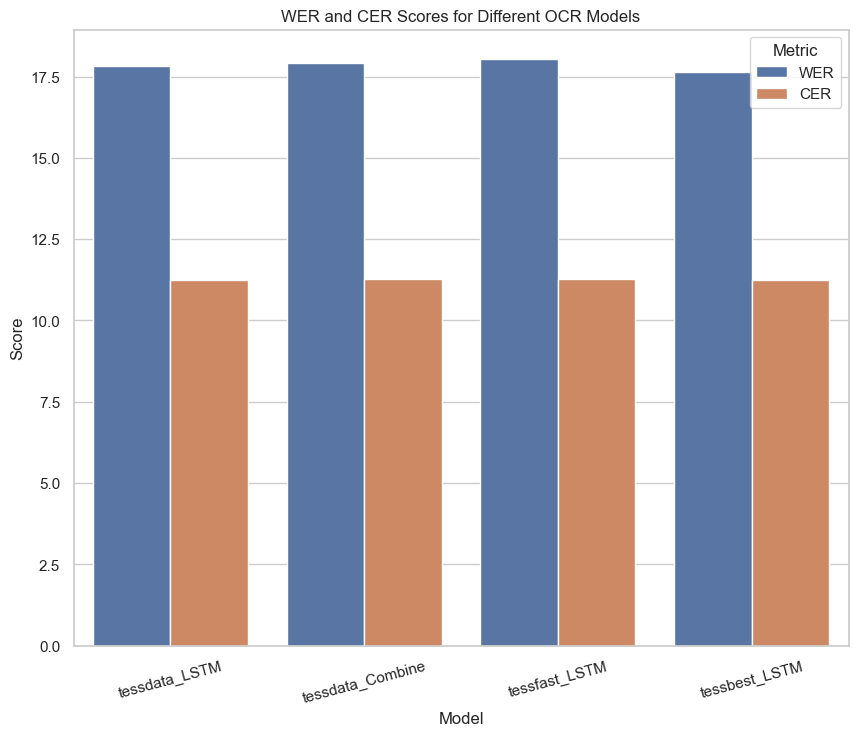

In [7]:
# Delete the 'Pretrained' item
result_without_first = dict(list(results.items())[1:])

# Create a DataFrame
df_metrics = pd.DataFrame(result_without_first).T.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')

# Rename columns
df_metrics.columns = ['Model', 'Metric', 'Score']

# Set the plot style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Model', y='Score', hue='Metric', data=df_metrics)

# Set the plot labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('WER and CER Scores for Different OCR Models')

# Customize the x-axis labels
custom_labels = ['tessdata_LSTM', 'tessdata_Combine', 'tessfast_LSTM', 'tessbest_LSTM']
ax.set_xticklabels(custom_labels)
plt.xticks(rotation=15)

# Display the plot
plt.show()

In [4]:
op = [1,2,3,4,5,6]
print(op[3-1:])

[3, 4, 5, 6]
